# Half Life of time-seri

In [ ]:
import numpy as np
import statsmodels.api as sm
from math import log


def half_life(z_array):
  z_lag = np.roll(z_array,1)
  z_lag[0] = 0
  z_ret = z_array - z_lag
  z_ret[0] = 0

  #adds intercept terms to X variable for regression
  z_lag2 = sm.add_constant(z_lag)

  model = sm.OLS(z_ret,z_lag2)
  res = model.fit()

  halflife = -log(2) / res.params[1]

  return halflife


In [ ]:
# Define the ticker list
# Fetch the data
import yfinance as yf
import pandas as pd
# import statsmodels.formula.api
import statsmodels.api

tickers_list = ['AAPL', 'MSFT', 'AMZN' , 'NVDA' , 'GOOGL' , 'GOOG' ,
                'XOM' , 'META' , 'TSLA' , 'UNH'
]


data = yf.download(tickers_list , start = "2022-5-1" , end = "2023-5-1")['Close']


result = statsmodels.tsa.vector_ar.vecm.coint_johansen(data[['AAPL' , 'MSFT' , 'AMZN']],
                                                       det_order = 0  ,
                                                       k_ar_diff = 3)


print(f'result.trace_stat : {result.trace_stat}\n\n')
# print(f'result.trace_stat_crit_vals : \n {result.trace_stat_crit_vals}\n\n')

print(f'result.max_eig_stat : {result.max_eig_stat}')

# print(result.)
h1 = result.max_eig_stat[0]
h2 = result.max_eig_stat[1]
h3 = result.max_eig_stat[2]




new_stationary_seri = h1 * data['AAPL'] + h2 * data['MSFT'] + h3 * data['AMZN']
new_stationary_seri

# print('-----------------------------')

adf(new_stationary_seri)

# for each in result:
#   print(each)
# print(result)


[*********************100%***********************]  10 of 10 completed
result.trace_stat : [16.00949355  4.72392573  0.38916696]


result.max_eig_stat : [11.28556782  4.33475877  0.38916696]


0.32270158546441574

# Johansen Test Function

In [47]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from hurst import compute_Hc, random_walk
import statsmodels.api


# data = yf.download(tickers_list , start = "2022-5-1" , end = "2023-5-1")['Close']
# global data


p_values_stocks = {}
hurst_exponent_stocks = {}
half_life_stocks = {}

def johansen_test(data , column1 , column2 , column3):
    # data = yf.download(tickers_list , start = "2022-5-1" , end = "2023-5-1")['Close']


    result = statsmodels.tsa.vector_ar.vecm.coint_johansen(data[[column1 , column2 , column3]],
                                                          det_order = 0  ,
                                                          k_ar_diff = 3)


    # print(f'{column1} , {column2} , {column3}')
    # print(f'result.max_eig_stat : {result.max_eig_stat}')

    h1 = result.max_eig_stat[0]
    h2 = result.max_eig_stat[1]
    h3 = result.max_eig_stat[2]

    new_stationary_seri = h1 * data[column1] + h2 * data[column2] + h3 * data[column3]
    # new_stationary_seri

    # Evaluate Hurst equation
    hurst , c, data = compute_Hc(new_stationary_seri , kind='price', simplified=True)

    # print('----------------------------------')
    p_value = adf(new_stationary_seri)

    key = column1 + ' , ' + column2 + ' , ' + column3

    p_values_stocks[key] = p_value
    hurst_exponent_stocks[key] = hurst

    half = half_life(new_stationary_seri)
    half_life_stocks[key] = half



    if p_value < 0.1 :
      print('\lr{ ')
      print(key)
      print('}')
      print()

      print('\lr{ ')
      print(f'-------------  pValue : {p_value}       -----')
      print('}')
      print()

      print('\lr{ ')
      print(f'-------------  hurst : {hurst}           -----')
      print('}')
      print()

      print('\lr{ ')
      print(f'-------------  halfLife : {half}        -----')
      print('}')
      print()



In [ ]:
# Define the ticker list
# Fetch the data
import yfinance as yf
import pandas as pd
# import statsmodels.formula.api
import statsmodels.api

tickers_list = ['AAPL', 'MSFT', 'AMZN' , 'NVDA' ,
                'GOOGL' , 'GOOG' ,
                'XOM' , 'META' , 'TSLA' , 'UNH'
]


data = yf.download(tickers_list , start = "2022-5-1" , end = "2023-5-1")['Close']

for column1 in tickers_list:
  for column2 in tickers_list:
    if column1 == column2 :
      continue

    for column3 in tickers_list:
      if column3 == column2 or column3 == column1:
        continue

      johansen_test(data , column1 , column2 , column3)



In [ ]:
# Define the ticker list
import pandas as pd
tickers_list = ['AAPL', 'MSFT', 'AMZN' , 'NVDA' , 'GOOGL' , 'GOOG' ,
                'XOM' , 'META' , 'TSLA' , 'UNH'
]

# Fetch the data
import yfinance as yf
# data = yf.download(tickers_list , start = "2022-5-1" , end = "2023-5-1")['Close']

AAPL  =  yf.download('AAPL' , start = "2022-5-1" , end = "2023-5-1")['Close']
MSFT  =  yf.download('MSFT' , start = "2022-5-1" , end = "2023-5-1")['Close']
AMZN  =  yf.download('AMZN' , start = "2022-5-1" , end = "2023-5-1")['Close']
NVDA  =  yf.download('NVDA' , start = "2022-5-1" , end = "2023-5-1")['Close']

GOOGL = yf.download('GOOGL' , start = "2022-5-1" , end = "2023-5-1")['Close']
GOOG  = yf.download('GOOG' , start = "2022-5-1" , end = "2023-5-1")['Close']
XOM   = yf.download('XOM' , start = "2022-5-1" , end = "2023-5-1")['Close']
META  = yf.download('META' , start = "2022-5-1" , end = "2023-5-1")['Close']
TSLA  = yf.download('TSLA' , start = "2022-5-1" , end = "2023-5-1")['Close']
UNH   = yf.download('UNH' , start = "2022-5-1" , end = "2023-5-1")['Close']

> > > > # CADF Test

In [ ]:
import numpy as np
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.tsatools import lagmat, add_trend
from statsmodels.tsa.adfvalues import mackinnonp

def adf(ts, maxlag=1):
    """
    Augmented Dickey-Fuller unit root test
    """
    # make sure we are working with an array, convert if necessary
    ts = np.asarray(ts)

    # Get the dimension of the array
    nobs = ts.shape[0]

    # Calculate the discrete difference
    tsdiff = np.diff(ts)

    # Create a 2d array of lags, trim invalid observations on both sides
    tsdall = lagmat(tsdiff[:, None], maxlag, trim='both', original='in')
    # Get dimension of the array
    nobs = tsdall.shape[0]

    # replace 0 xdiff with level of x
    tsdall[:, 0] = ts[-nobs - 1:-1]
    tsdshort = tsdiff[-nobs:]


    # Calculate the linear regression using an ordinary least squares model
    results = OLS(tsdshort, add_trend(tsdall[:, :maxlag + 1], 'c')).fit()


    # print(results)
    adfstat = results.tvalues[0]

    # Get approx p-value from a precomputed table (from stattools)
    pvalue = mackinnonp(adfstat, 'c', N=1)
    # print(f'pvalue : {pvalue}')
    return pvalue

def cadf(x, y):
    """
    Returns the result of the Cointegrated Augmented Dickey-Fuller Test
    """
    # Calculate the linear regression between the two time series
    ols_result = OLS(x, y).fit()

    # Augmented Dickey-Fuller unit root test
    return adf(ols_result.resid)

# Hurst Exponent

In [ ]:
!pip install hurst

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


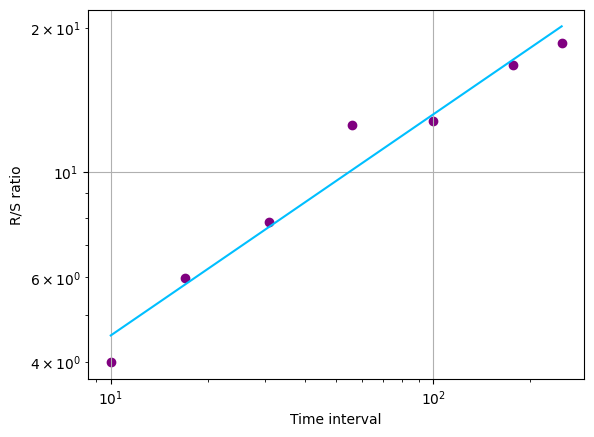

H=0.4630, c=1.5622


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from hurst import compute_Hc, random_walk

np.random.seed(42)
random_changes = 1. + np.random.randn(99999) / 1000.
series = np.cumprod(random_changes)  # create a random walk from random changes

import matplotlib.pyplot as plt
from hurst import compute_Hc, random_walk
# Evaluate Hurst equation
H, c, data = compute_Hc(AAPL , kind='price', simplified=True)

# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))